### Example: Exploring Marathon Finishing Times

In [6]:
# importing libraries and data from github
import requests as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv'
data = pd.read_csv(url)
data.shape
data.head()

data.dtypes

(37250, 4)

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


age        int64
gender    object
split     object
final     object
dtype: object

In [7]:
# because times loaded by Pandas are strings it will be converted
# into timedata format
data['split'] = pd.to_timedelta(data['split'])
data['final'] = pd.to_timedelta(data.final)

data.head()
data.dtypes

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [8]:
# additional columns with times converted to total_seconds
data['split_sec'] = data['split'].dt.total_seconds().astype(int)
data['final_sec'] = data['final'].dt.total_seconds().astype(int)

data.head()
(data.age < 20).sum()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938,7731
1,32,M,01:06:26,02:09:28,3986,7768
2,31,M,01:06:49,02:10:42,4009,7842
3,38,M,01:06:16,02:13:45,3976,8025
4,31,M,01:06:32,02:13:59,3992,8039


131

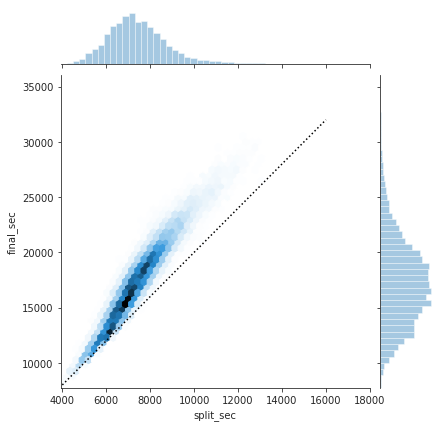

In [9]:
# plotting data times with jointplot() function
with sns.axes_style('ticks'):
    g = sns.jointplot('split_sec', 'final_sec', data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                   np.linspace(8000, 32000), ':k')
plt.show();

In [10]:
# checking which runners have had negative splits(split_frac<0)
data['split_frac'] = 1 - 2 * data.split_sec / data.final_sec
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938,7731,-0.018756
1,32,M,01:06:26,02:09:28,3986,7768,-0.026262
2,31,M,01:06:49,02:10:42,4009,7842,-0.022443
3,38,M,01:06:16,02:13:45,3976,8025,0.009097
4,31,M,01:06:32,02:13:59,3992,8039,0.006842


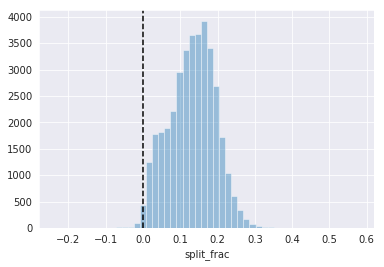

In [11]:
# vertical line is a border between groups of runners in accordance to split
with sns.axes_style('darkgrid'):
    sns.distplot(data['split_frac'], kde=False)
    plt.axvline(0, color='k', linestyle='--')
plt.show();

In [12]:
# number of negative split runners
sum(data.split_frac < 0)

251

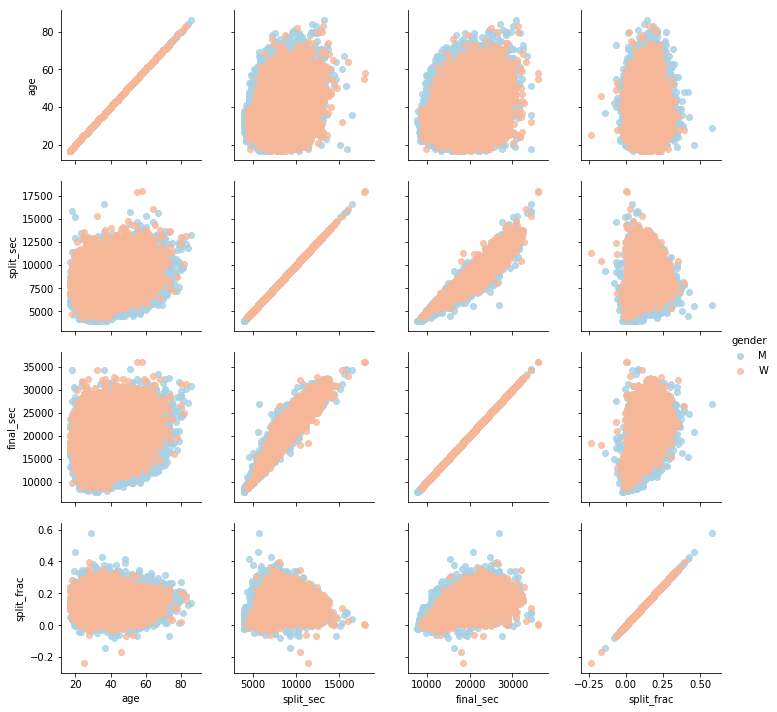

In [13]:
# looking for a correlation between split fraction and othe variables
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

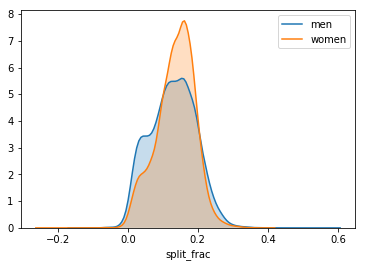

In [14]:
# histogram of split fractions for men and women
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

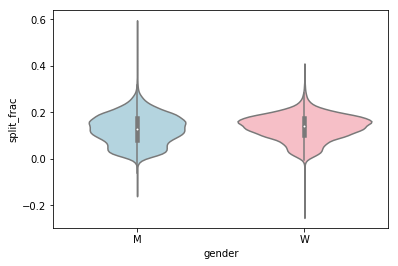

In [15]:
# comparing distributions in the function of age(?????)
sns.violinplot('gender', 'split_frac', data=data,
              palette=['lightblue', 'lightpink']);

In [16]:
# new column creates distribution for age categories
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938,7731,-0.018756,30
1,32,M,01:06:26,02:09:28,3986,7768,-0.026262,30
2,31,M,01:06:49,02:10:42,4009,7842,-0.022443,30
3,38,M,01:06:16,02:13:45,3976,8025,0.009097,30
4,31,M,01:06:32,02:13:59,3992,8039,0.006842,30


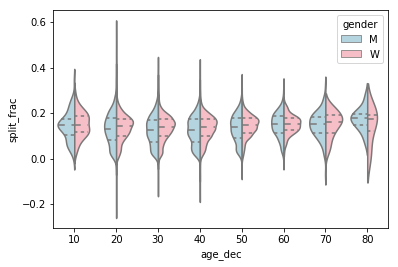

In [17]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot('age_dec', 'split_frac', hue='gender', data=data,
                  split=True, inner='quartile', palette=['lightblue', 'lightpink'])
plt.show();

In [ ]:
x = data[data.age_dec==80]
sns.violinplot('gender', 'split_frac', data=x);

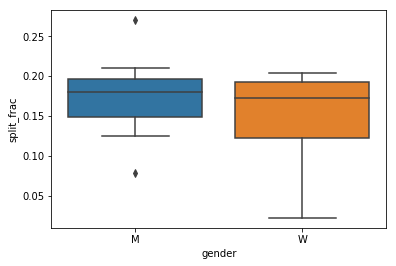

In [55]:
sns.boxplot('gender', 'split_frac', data=x);

In [50]:
data[data.age_dec==80].split_frac.max()
data[(data.age_dec==80)&(data.gender=='W')].split_frac.mean()
data[(data.age_dec==80)]

0.2701235708511376

0.1430282770235496

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
35446,80,M,02:46:58,06:43:03,10018,24183,0.171484,80
35683,80,M,02:41:29,06:48:57,9689,24537,0.210254,80
35695,81,M,02:42:15,06:49:10,9735,24550,0.206925,80
35915,82,W,02:48:26,06:55:31,10106,24931,0.189282,80
36412,80,M,02:38:00,07:12:57,9480,25977,0.270124,80
36635,80,W,03:37:23,07:24:30,13043,26670,0.021897,80
36766,84,M,03:18:03,07:32:53,11883,27173,0.125382,80
36916,81,M,03:32:58,07:42:12,12778,27732,0.078465,80
37036,80,M,03:20:18,07:55:45,12018,28545,0.157961,80
37074,80,M,03:15:36,08:00:15,11736,28815,0.185424,80


In [29]:
for age in range(10, 90, 10):
    if age == 10:
        print('Women in age category under ' + str(age) + ':  ' + str(round(100*((data.age_dec==age)&(data.gender=='W')).sum()/(data.age_dec==age).sum(), 2)))
    else:
        print('Women in age category ' + str(age) + ':  ' + str(round(100 * ((data.age_dec==age) & (data.gender=='W')).sum()/(data.age_dec==age).sum(), 2)))

Women in age category under 10:  33.59
Women in age category 20:  48.82
Women in age category 30:  36.66
Women in age category 40:  30.68
Women in age category 50:  24.63
Women in age category 60:  18.65
Women in age category 70:  13.25
Women in age category 80:  26.67


In [31]:
age_cat = {}
ages = [int(age) for age in range(10, 90, 10)]

for age in ages:
    m = round(100*((data.age_dec==age)&(data.gender=='W')).sum()/(data.age_dec==age).sum(), 2)
    age_cat[age] = m

x = pd.Series(age_cat)

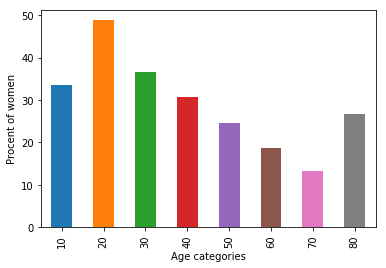

In [32]:
ax = x.plot(kind='bar')
ax.set_xlabel('Age categories')
ax.set_ylabel("Procent of women");

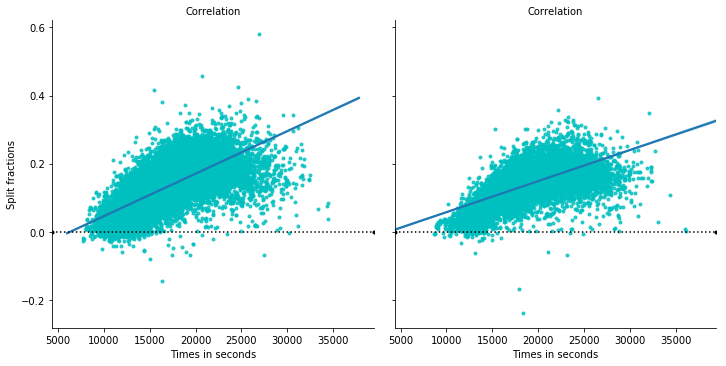

In [99]:
# checking if negative split runners correlate with finishing quickly
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
              markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.0, color='k', ls=':').set_axis_labels('Times in seconds', 'Split fractions').set_titles('Correlation');

#### The end